蒙地卡羅模擬作業 \\
(1) 繳交時間: 11/24 紙本 \\
(2) 報告架構: 同笑狀波幅作業，用Python實作 \\
(3) 報告內容: \\
a. 跑幾次，標準差/平均數可以收斂到1% \\
b. 與bs公式比較 \\
c. 比較250、52、12、1天抽樣1次，哪種收斂較快 \\

BS model $$C=SN(d_1)-Ke^{-r\Delta{t}}N(d_2)$$
where $$d_1=\frac{\ln\frac{S}{K}+(r+0.5\sigma^2)\Delta{t}}{\sigma\sqrt{\Delta{t}}}$$, $$d_2=d_1-\sigma\sqrt{\Delta{t}}$$

log Normal
$$ S_{t+1}=S_te^{(r-0.5\sigma^2)\Delta{t}+\sigma\epsilon\sqrt{\Delta{t}}}$$

In [47]:
!lsb_release -a

!uname -r

!python --version

No LSB modules are available.
Distributor ID:	Ubuntu
Description:	Ubuntu 18.04.6 LTS
Release:	18.04
Codename:	bionic
5.10.133+
Python 3.7.15


In [48]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[*********************100%***********************]  1 of 1 completed


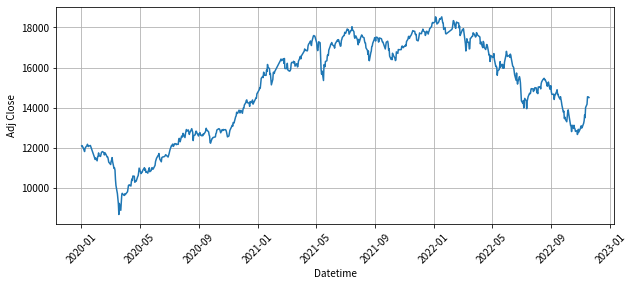

0.0003
0.1965


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,12026.500000,12110.740234,12026.230469,12100.480469,12100.480469,2023800
2020-01-03,12167.440430,12197.639648,12023.599609,12110.429688,12110.429688,2572900
2020-01-06,12035.709961,12040.080078,11953.360352,11953.360352,11953.360352,2345200
2020-01-07,11961.969727,11986.030273,11822.400391,11880.320312,11880.320312,2338400
2020-01-08,11818.759766,11899.669922,11777.450195,11817.099609,11817.099609,2428800
...,...,...,...,...,...,...
2022-11-14,14080.910156,14217.299805,14076.940430,14174.900391,14174.900391,3396800
2022-11-15,14325.490234,14568.509766,14278.530273,14546.309570,14546.309570,3441500
2022-11-16,14637.849609,14657.660156,14481.059570,14537.349609,14537.349609,3356100


In [80]:
import pandas as pd
import numpy as np
import yfinance as yf
from matplotlib import pyplot as plt

#取得台積電股價
stock = "^TWII"
start = '2020-01-01'
end = '2022-11-19'
data = yf.download(stock, start=start, end=end) #台指大盤

data.index = pd.to_datetime(data.index)

plt.figure(figsize=(10,4))
plt.plot(data.index, data['Adj Close'])
# plt.title(f'{stock}; {start} to {end}; mu={mu}; sigma={sigma}')
plt.ylabel('Adj Close')
plt.xlabel('Datetime')
plt.grid(axis='both')
plt.xticks(rotation=45)
plt.savefig('/content/drive/MyDrive/政大課程/111選擇權評價與應用/蒙地卡羅/大盤.png', bbox_inches='tight')
plt.show()

print(round(data['Adj Close'].pct_change().mean(), 4))
print(round(data['Adj Close'].pct_change().std()* (250)**0.5,4))

display(data)

14460 14650 0.0158 0.1965 1 250 10000
(250, 10000)
Simulated price is 1151.4005157409217
Black Scholes Price is 1150.1133508296161
std/mean is 0.016282145262011733
(250, 10100)
Simulated price is 1132.4542103779547
Black Scholes Price is 1150.1133508296161
std/mean is 0.01629485158184735
(250, 10200)
Simulated price is 1153.6517230541615
Black Scholes Price is 1150.1133508296161
std/mean is 0.01618483346948967
(250, 10300)
Simulated price is 1126.0716591339003
Black Scholes Price is 1150.1133508296161
std/mean is 0.01612748310512314
(250, 10400)
Simulated price is 1147.672314426832
Black Scholes Price is 1150.1133508296161
std/mean is 0.015874446025964304
(250, 10500)
Simulated price is 1162.750603308049
Black Scholes Price is 1150.1133508296161
std/mean is 0.01580141380991584
(250, 10600)
Simulated price is 1161.8224685344214
Black Scholes Price is 1150.1133508296161
std/mean is 0.015897084914388192
(250, 10700)
Simulated price is 1191.0510298809295
Black Scholes Price is 1150.1133508

,mcs,bs,condiction,N
0,1151.400516,1150.113351,0.016282,10000
1,1132.454210,1150.113351,0.016295,10100
2,1153.651723,1150.113351,0.016185,10200
3,1126.071659,1150.113351,0.016127,10300
4,1147.672314,1150.113351,0.015874,10400
...,...,...,...,...
161,1142.343167,1150.113351,0.010116,26100
162,1141.932791,1150.113351,0.010132,26200
163,1124.844902,1150.113351,0.010141,26300
164,1139.820601,1150.113351,0.010041,26400


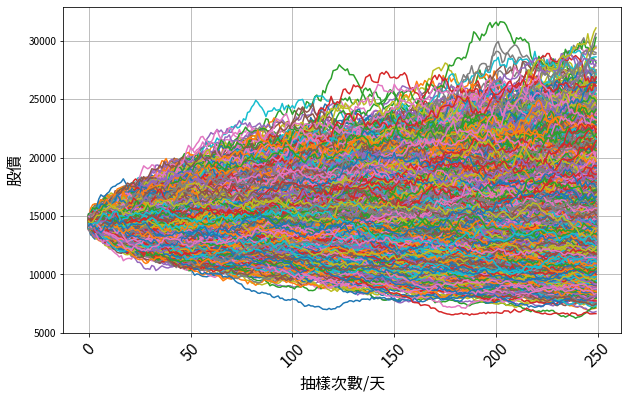

In [77]:
def MCS(S, T, r, sigma, steps, N):
    dt = T/steps
    ST = np.log(S) + np.cumsum(((r - 0.5*sigma**2)*dt + sigma * np.sqrt(dt) * np.random.normal(size=(steps,N))),axis=0)
    return np.exp(ST)

def BS(cp_flag, S, K, T, r, sigma):
    d1 = (np.log(S/K) + (r + sigma**2/2)*T) / sigma*np.sqrt(T)
    d2 = d1 - sigma* np.sqrt(T)
    if cp_flag == 'c':
      price = S * norm.cdf(d1) - K * np.exp(-r*T)*norm.cdf(d2)#call price
    else:
      price = K * math.exp(-r*T)*norm.cdf(-d2) - S * norm.cdf(-d1)#put price
    return price

#引入套件
import numpy as np
import math
from scipy.stats import norm
#此處都用call執行
#參數設定

np.random.seed(111352021)
S = 14460 #現貨價
K = 14650 #履約價
r = 0.0158 #台灣十年公債殖利率
sigma = round(data['Adj Close'].pct_change().std()* (250)**0.5,4) #現貨的年化平均報酬的標準差(表準差*根號250)
T = 1 #假設到期1年
days = 1 #每幾天抽樣一次
steps = int(250/days)#切割期數 (250/12=20, 250/52=4.8)
N = 10000 ##模擬次數
print(S, K, r, sigma, T, steps, N)

mcs_ls = []
bs_ls = []
std_mean_ls = []
N_ls = []

while True:
  paths = MCS(S, T, r, sigma, steps, N)
  payoffs = np.maximum(paths[-1]-K, 0) #比較ST call的內涵價值，max(ST-K, 0)
  mcs_price = np.mean(payoffs)*np.exp(-r*T) #St call = 平均的ST call折現

  bs_price = BS('c', S, K, T, r, sigma) #BS計算St call

  condiction = (payoffs.std() / N**0.5) / payoffs.mean()  #收斂條件

  print(paths.shape)
  print(f"Simulated price is {mcs_price}")
  print(f"Black Scholes Price is {bs_price}")
  print(f"std/mean is {condiction}")

  mcs_ls.append(mcs_price)
  bs_ls.append(bs_price)
  std_mean_ls.append(condiction)
  N_ls.append(N)

  if condiction <=0.01 :
    break
  else:
    N += 100

dfs = pd.DataFrame.from_dict({"mcs":mcs_ls,
            "bs":bs_ls,
            "condiction":std_mean_ls,
            "N":N_ls})
dfs.to_csv(f"/content/drive/MyDrive/政大課程/111選擇權評價與應用/蒙地卡羅/{days}.csv", index=False)

display(dfs)

plt.figure(figsize=(10,6))
if days == 250:
  add_paths = np.insert(paths.transpose(), 0, S, axis=1).transpose()#因為只抽一期，所以需要特殊處理
else:
  add_paths = np.insert(paths, 0, S, axis=1)

plt.plot(add_paths)
plt.ylabel('股價', fontsize=16)
plt.xlabel("抽樣次數/天", fontsize=16)
plt.grid(axis='both')
plt.xticks(rotation=45, fontsize=16)
plt.xticks(fontsize=16)
plt.savefig(f'/content/drive/MyDrive/政大課程/111選擇權評價與應用/蒙地卡羅/MCS_{days}.png', bbox_inches='tight')
plt.show()

In [78]:
# Colab 進行matplotlib繪圖時顯示繁體中文
# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

import matplotlib as mpl
import matplotlib.pyplot as plt 
from matplotlib.font_manager import fontManager

# 改style要在改font之前
# plt.style.use('seaborn')  

fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

--2022-11-20 17:16:32--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 142.251.16.138, 142.251.16.102, 142.251.16.101, ...
Connecting to drive.google.com (drive.google.com)|142.251.16.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/2d1g65lh3u2qumcsvdf56ivig02c607q/1668964575000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=f5b48265-de37-4baf-b14b-668385c4c12b [following]
--2022-11-20 17:16:35--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/2d1g65lh3u2qumcsvdf56ivig02c607q/1668964575000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=f5b48265-de37-4baf-b14b-668385c4c12b
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 172.253.115.132, 2607:f8b0:4004:c06::84
Connecting to doc-0

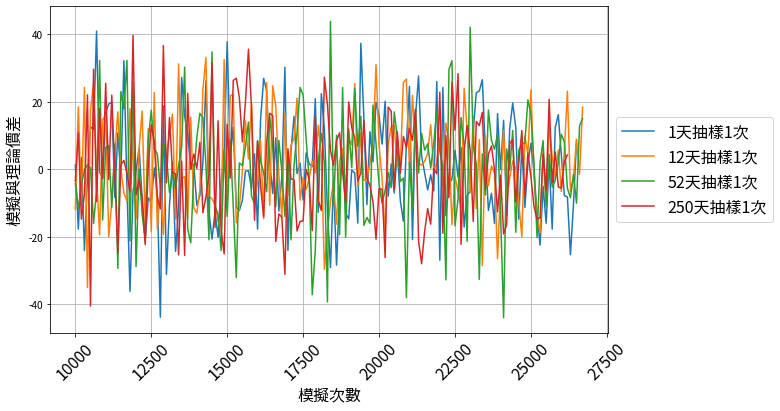

In [79]:
def read_N(i):
  dfs = pd.read_csv(f"/content/drive/MyDrive/政大課程/111選擇權評價與應用/蒙地卡羅/{i}.csv")
  dfs['diff'] = (dfs['mcs'] - dfs['bs'])
  return dfs[['diff','N']]

import pandas as pd

df1 = read_N(1)
df12 = read_N(12)
df52 = read_N(52)
df250 = read_N(250)

plt.figure(figsize=(10,6))
plt.plot(df1['N'], df1['diff'], label='1天抽樣1次')
plt.plot(df12['N'], df12['diff'], label='12天抽樣1次')
plt.plot(df52['N'], df52['diff'],label='52天抽樣1次')
plt.plot(df250['N'], df250['diff'],label='250天抽樣1次')

plt.ylabel('模擬與理論價差', fontsize=16)
plt.xlabel("模擬次數", fontsize=16)
plt.grid(axis='both')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=16)
plt.xticks(rotation=45, fontsize=16)
plt.xticks(fontsize=16)
plt.savefig('/content/drive/MyDrive/政大課程/111選擇權評價與應用/蒙地卡羅/差距.png', bbox_inches='tight')
plt.show()
